# Scipy ODE Solvers

We have a couple of options:

### 1. ``odeint()``: -> FFT methods for PDEs

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html


### Problem: Lotka Volterra model

Consider the following system of nonlinear differential equations modeling a predator-prey relationship:

$$
\dot{x} = ax - bxy
$$
$$
\dot{y} = dxy - cy
$$

where:
* $\dot{x}$ is the rate of change of the prey population ($x$).
* $\dot{y}$ is the rate of change of the predator population ($y$).

* $a = 1.0$ is the prey birth rate.
* $b = 0.1$ is the prey death rate (due to predation).
* $c = 1.5$ is the predator death rate.
* $d = 0.75$ is the predator birth rate.

The initial conditions are:

$$x(0) = 10 \quad \text{and} \quad y(0) = 5$$

Using numerical methods, compute and plot the solutions for the time interval $t \in [0, 50]$.

In [76]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [77]:
def lotka_volterra(state, t, a, b, c, d):
    """
    """
    x, y = state  # Unpack the current populations

    # Slopes:
    dxdt = a * x - b * x * y
    dydt = d * x * y - c * y
    
    return [dxdt, dydt]

In [78]:
# Fix parameters
a = 3.0 
b = 0.01
c = 5.0
d = 0.005

In [82]:
# Initial conditions [x0, y0]
p_0 = [10, 5]  # Start with 10 prey and 5 predators

# Time points where the solution will be computed
t = np.linspace(0, 50, 1000)

# odeint integration:
sol = odeint(lotka_volterra, p_0, t, args=(a, b, c, d))

# Extract the slns:
x_pol = sol[:, 0] # x(t) -> prey population.
y_pol = sol[:, 1] # y(t) -> predator population.


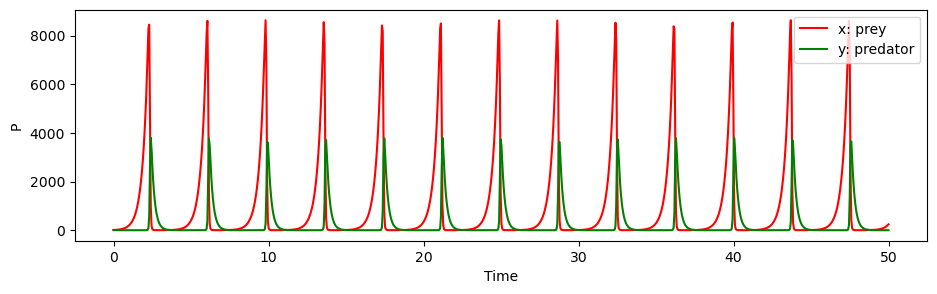

In [83]:
# Plotting
plt.figure(figsize=(11, 3))

plt.plot(t, x_pol, 'red', label='x: prey')
plt.plot(t, y_pol, 'green', label='y: predator')

plt.xlabel('Time')
plt.ylabel('P')

plt.legend()

plt.show()


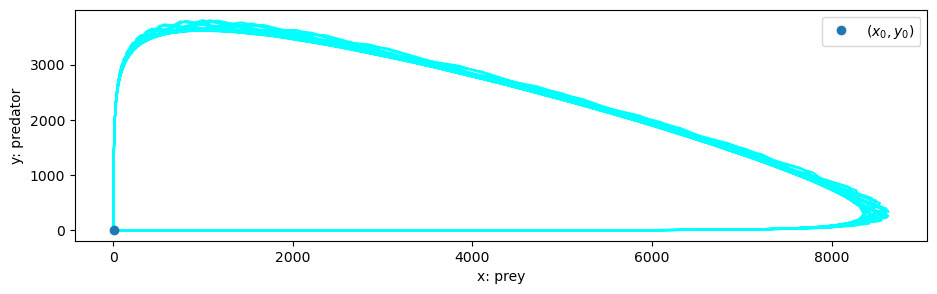

In [84]:
# Phase Portrait (Predator vs. Prey)
plt.figure(figsize=(11, 3))
plt.plot(x_pol, y_pol, 'cyan')
plt.plot(p_0[0], p_0[1], 'o', label=r'$(x_0, y_0)$')

plt.xlabel('x: prey')
plt.ylabel('y: predator')

plt.legend()
plt.show()

### 2. ``solveivp()``:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html



We can use **solve_ivp** from the scipy.integrate package to solve initial value ODEs in python.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

**CONSTRUCTION:**  

Let $F$ be a function object to the function that computes 

$$\frac{dS(t)}{dt} = F(t, S(t))$$

$$S(t_0)=S_0$$

- $t$ is a one-dimensional independent variable (time)


- $S(t)$ is an n-dimensional vector-valued function (state)


- $F(t, S(t))$ defines the differential equation.


- $S_0$ is an initial value for $S$. 

The way we use the solver to solve the differential equation is:

``solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)``

where:

- $\rm fun$ takes in the function in the right-hand side of the system.


- $\rm t\_span$ is the interval of integration $(t_0, t_f)$, where $t_0$ is the start and $t_f$ is the end of the interval.


- $\rm s0$ is the initial state.


- There are a couple of methods that we can choose, the default is 'RK45', which is the explicit Runge-Kutta method of order 5(4).


- There are other methods you can use as well, see the end of this section for more information. 


- $\rm t\_eval$ takes in the times at which to store the computed solution, and must be sorted and lie within $\rm t\_span$. 

### Example:

Consider the ODE:

$$
\frac{dS(t)}{dt}=\cos(t)
$$

for an initial value $S_0 = S(t_0) = 0$.

1. Find the exact solution using sympy.


2. Use *solve\_ivp* to approximate the solution to this initial value problem over the interval $[0, \pi]$.


3. Plot the approximate solution versus the exact solution and the relative error over time.

### 1. Find the exact solution using sympy.

In [85]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
from sympy import cos

In [86]:
# Define symbols

s = sp.symbols("s", cls = sp.Function)
t = sp.symbols("t")

In [87]:
# Define ODE

diffeq = sp.Eq(s(t).diff(t) - cos(t), 0)

display(diffeq)

Eq(-cos(t) + Derivative(s(t), t), 0)

In [88]:
# Solve the ODE:

result = sp.dsolve(diffeq, s(t), ics = {s(0):0})

display(result)

Eq(s(t), sin(t))

### Plot:

In [89]:
# Solution:
sln_t = lambda t: np.sin(t)

# Define step size:
h = 0.1

# t_axis:
t_axis = np.arange(0., np.pi, h)

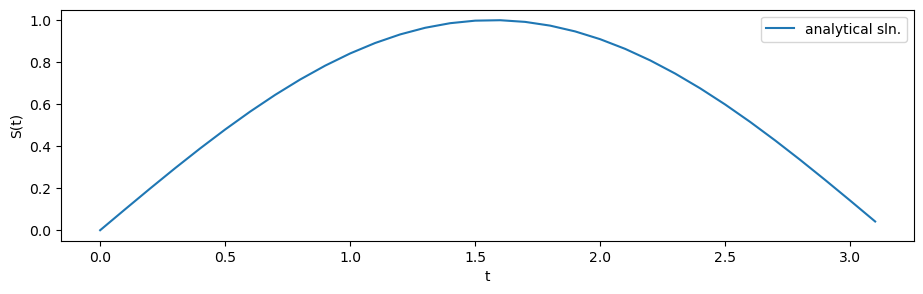

In [90]:
plt.figure(figsize = (11, 3))

plt.plot(t_axis, sln_t(t_axis), label = "analytical sln.")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### 2. Use *solve\_ivp* to approximate the solution to this initial value problem over the interval $[0, \pi]$.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [91]:
from scipy.integrate import solve_ivp

In [92]:
# Define slope, RHS of the ODE:

f_ode = lambda t, s: np.cos(t)

# Numerical sln using scipy

sln_num = solve_ivp(f_ode, [0, np.pi], [0], method='RK45', t_eval = t_axis)

In [93]:
# Times from the ODE integrator:
print(sln_num)
#print(sln_num.t)

#print(sln_num.y[0])

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  3.000e+00  3.100e+00]
        y: [[ 0.000e+00  9.983e-02 ...  1.416e-01  4.177e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 38
     njev: 0
      nlu: 0


In [94]:
print(sln_num.t.shape)

print(sln_num.y[0].shape)

(32,)
(32,)


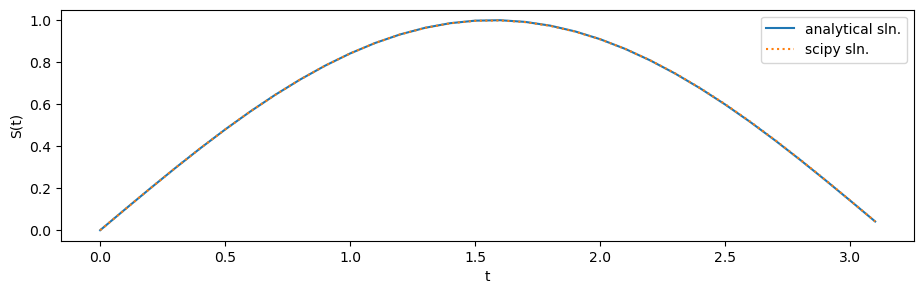

In [95]:
plt.figure(figsize = (11, 3))

plt.plot(t_axis, sln_t(t_axis), label = "analytical sln.", linestyle = "-")
plt.plot(sln_num.t, sln_num.y[0], label = "scipy sln.", linestyle = ":")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### Error:

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_86358/1117626256.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_axis, np.log10(abs(sln_num.y[0] - sln_t(t_axis))),\


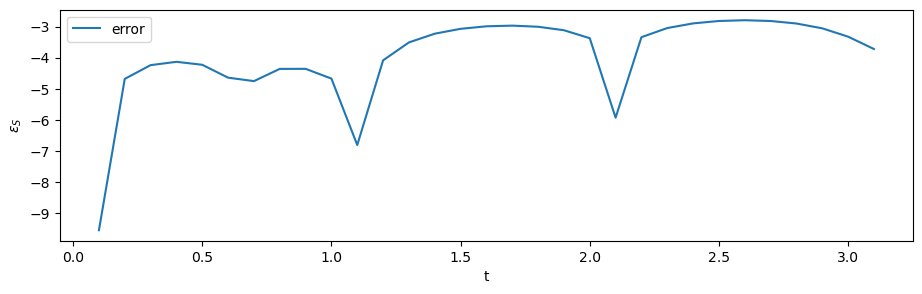

In [96]:
plt.figure(figsize = (11, 3))

plt.plot(t_axis, np.log10(abs(sln_num.y[0] - sln_t(t_axis))),\
         label = "error", linestyle = "-")

plt.xlabel('t')
plt.ylabel(r'$\epsilon_S$')

plt.legend()

plt.show()

## Second solution:

In [97]:
sln_num2 = solve_ivp(f_ode, [0, np.pi], [0], method= "DOP853", t_eval=t_axis, rtol = 1e-8, atol = 1e-8)


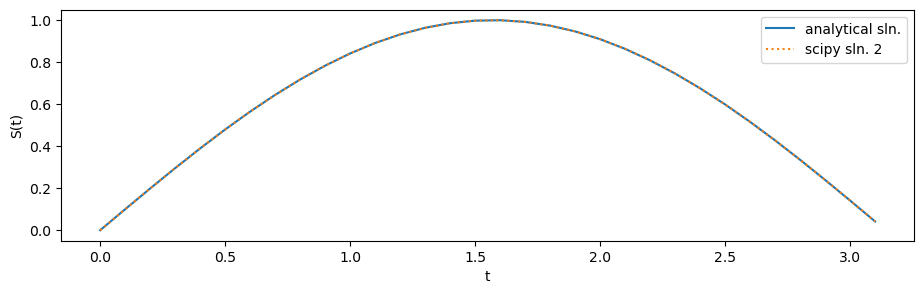

In [98]:
plt.figure(figsize = (11, 3))

plt.plot(t_axis, sln_t(t_axis), label = "analytical sln.", linestyle = "-")
plt.plot(sln_num2.t, sln_num2.y[0], label = "scipy sln. 2", linestyle = ":")

plt.xlabel('t')
plt.ylabel('S(t)')

plt.legend()

plt.show()

### Error

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_86358/3808989550.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_axis, np.log10(abs(sln_num2.y[0] - sln_t(t_axis))),\


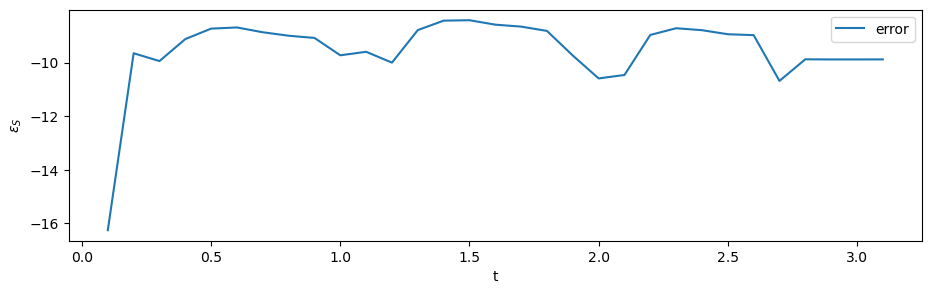

In [99]:
plt.figure(figsize = (11, 3))

plt.plot(t_axis, np.log10(abs(sln_num2.y[0] - sln_t(t_axis))),\
         label = "error", linestyle = "-")

plt.xlabel('t')
plt.ylabel(r'$\epsilon_S$')

plt.legend()

plt.show()

/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_86358/363487240.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_axis,  np.log10(abs(sln_num.y[0] - sln_t(t_axis))),label = "error O(h^4)", linestyle = "-")
/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_86358/363487240.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(t_axis,  np.log10(abs(sln_num2.y[0] - sln_t(t_axis))), label = "error O(h^8)", linestyle = ":")


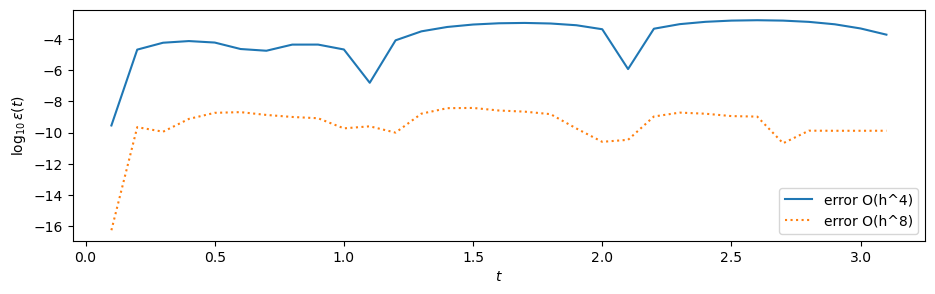

In [100]:
plt.figure(figsize = (11, 3))

plt.plot(t_axis,  np.log10(abs(sln_num.y[0] - sln_t(t_axis))),label = "error O(h^4)", linestyle = "-")
plt.plot(t_axis,  np.log10(abs(sln_num2.y[0] - sln_t(t_axis))), label = "error O(h^8)", linestyle = ":")

plt.xlabel(r'$t$')
plt.ylabel(r'$\log_{10}\epsilon(t)$')

plt.legend()

plt.show()

## Solving systems of ODEs:

### Example:

We want to solve this system of ODEs:

$$\dot{x}= t^2\,y$$

$$\dot{y}= -t\,x$$

Let the state of a system be defined by:

$$S(t) = \left[\begin{array}{c} x(t) \\y(t) \end{array}\right]$$

and let the evolution of the system be defined by the ODE

$$
\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & t^2 \\
-t & 0
\end{array}\right]S(t).
$$

(a) Use *solve\_ivp* to solve this ODE for the time interval $[0, 10]$ with an initial value of $S_0 = \left[\begin{array}{c} 1 \\1 \end{array}\right]$.

(b) Plot the solution in ($x(t), y(t)$).

In [101]:
# Define the slope function:

func = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

In [102]:
# Define the step size
h = 0.01

# Define t axis:
t_axis = np.arange(0., 10. + h, h)

# Compute solution:
sln = solve_ivp(func, [0., 10.], [1., 1.], method= "RK45", t_eval = t_axis) 

In [103]:
print(sln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.990e+00  1.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  2.114e+00  2.128e+00]
            [ 1.000e+00  9.999e-01 ...  1.214e-01 -9.236e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 854
     njev: 0
      nlu: 0


In [104]:
# The x(t) solution:

print(sln.y[0])

# The y(t) solution:

print(sln.y[1])

[1.         1.00000033 1.00000266 ... 1.89038287 2.11379515 2.1283937 ]
[ 1.          0.99995     0.9998     ...  0.32308808  0.1214254
 -0.09235675]


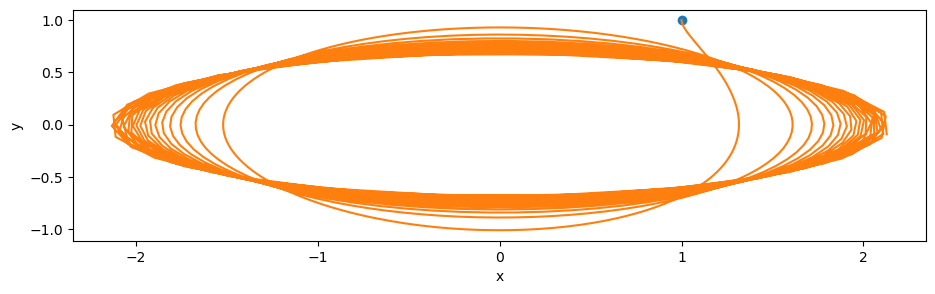

In [105]:
plt.figure(figsize = (11, 3))

#plt.plot(sln.y.T[:, 0], sln.y.T[:, 1])

plt.plot(1,1, marker = "o")
plt.plot(sln.y[0], sln.y[1])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

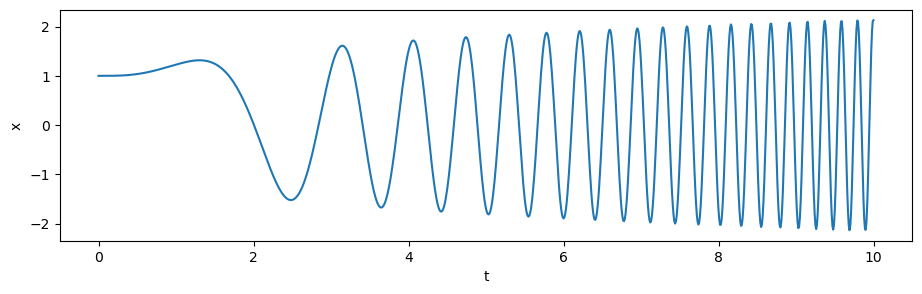

In [106]:
plt.figure(figsize = (11, 3))

#plt.plot(sln.t, sln.y.T[:, 0])

plt.plot(sln.t, sln.y[0])

plt.xlabel('t')
plt.ylabel('x')

plt.show()

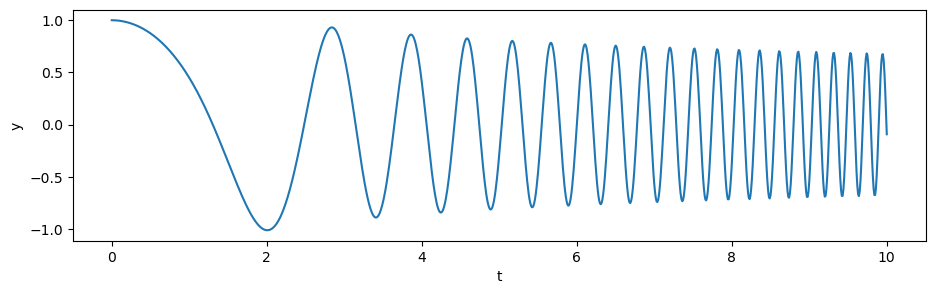

In [107]:
plt.figure(figsize = (11, 3))

plt.plot(sln.t, sln.y[1])

plt.xlabel('t')
plt.ylabel('y')

plt.show()

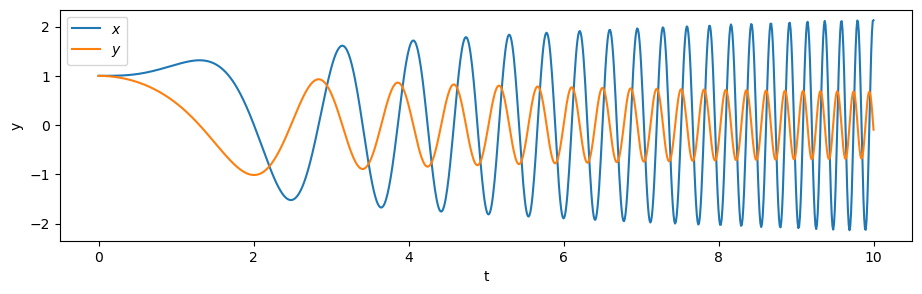

In [108]:
plt.figure(figsize = (11, 3))

#plt.plot(sln.t, sln.y.T[:, 0])
#plt.plot(sln.t, sln.y.T[:, 1])

plt.plot(sln.t, sln.y[0], label = r"$x$")
plt.plot(sln.t, sln.y[1], label = r"$y$")

plt.legend()

plt.xlabel('t')
plt.ylabel('y')

plt.show()